In [14]:
# 필요한 라이브러리 로딩
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
# 데이터 불러오기
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    return (x_train, y_train), (x_test, y_test)

In [16]:
# 이미지 탐색
def explore_data(x_train, y_train, x_test, y_test, class_names):

    # 데이터 형태 확인
    print('데이터 형태 확인')
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    # 훈련데이터 이미지 시각화
    print('훈련 이미지 시각화')
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_train[i])
        plt.title(class_names[y_train[i][0]])
        plt.axis('off')
    plt.show()

    # 테스트 데이터 이미지 시각화
    print('테스트 이미지 시각화')
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[i])
        plt.title(class_names[y_test[i][0]])
        plt.axis('off')
    plt.show()

In [30]:
# 전처리
def preprocess_data(x_train, x_test):
    # 정규화
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test

# 모델 구성

In [35]:
# 1 VGG BLOCKS 모델 생성
def vgg_model_1(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    return model

In [19]:
# 2 VGG BLOCKS 모델 생성
def vgg_model_2(input_shape):
    model2 = Sequential()
    model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model2.add(Dense(10, activation='softmax'))
    return model2

In [20]:
# 3 VGG BLOCKS 모델 생성
def vgg_model_3(input_shape):
    model3 = Sequential()
    model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Flatten())
    model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model3.add(Dense(10, activation='softmax'))
    return model3

In [22]:
# 모델 컴파일
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
# 모델 학습
def train_model(model, x_train, y_train, x_test, y_test, epochs, batch_size):
    checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    earlystopping = EarlyStopping(monitor='val_accuracy', patience=5)

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystopping])

In [24]:
# 테스트 데이터 예측 및 모델 평가
def evaluate_model(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test)
    return scores

데이터 형태 확인
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
훈련 이미지 시각화


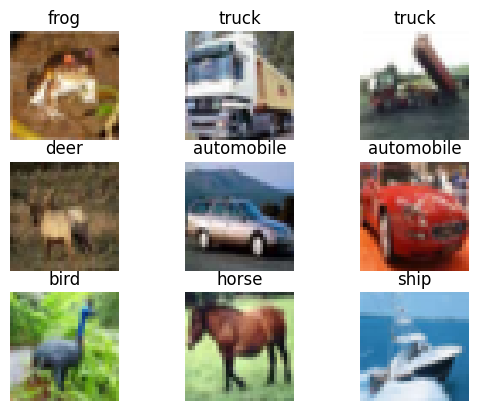

테스트 이미지 시각화


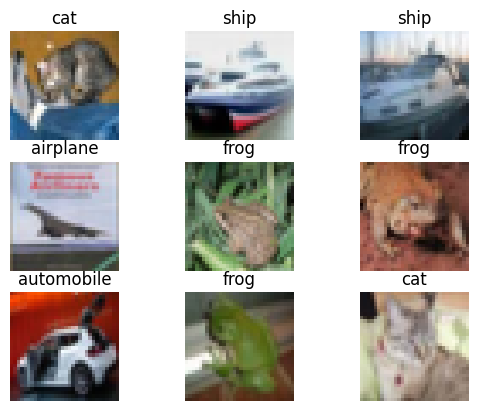

VGG1 모델 요약
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1048704   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                           

In [ ]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = load_data()
explore_data(x_train, y_train, x_test, y_test, class_names)
x_train, y_train = preprocess_data(x_train, y_train)
vgg1 = vgg_model_1((32,32,3))
print('VGG1 모델 요약')
print(vgg1.summary())
vgg2 = vgg_model_2((32,32,3))
print('VGG2 모델 요약')
print(vgg2.summary())
vgg3 = vgg_model_3((32,32,3))
print('VGG3 모델 요약')
print(vgg3.summary())
vgg1 = compile_model(vgg1)
vgg2 = compile_model(vgg2)
vgg3 = compile_model(vgg3)
vgg1 = train_model(vgg1, x_train, y_train, x_test, y_test, 100, 64)
vgg2 = train_model(vgg2, x_train, y_train, x_test, y_test, 100, 64)
vgg3 = train_model(vgg3, x_train, y_train, x_test, y_test, 100, 64)
scores1 = evaluate_model(vgg1, x_test, y_test)
scores2 = evaluate_model(vgg2, x_test, y_test)
scores3 = evaluate_model(vgg3, x_test, y_test)
print('VGG1 Accuracy: %.3f' % scores1[1])
print('VGG2 Accuracy: %.3f' % scores2[1])
print('VGG3 Accuracy: %.3f' % scores3[1])

In [ ]:
# 실제 이미지로 예측
def predict_image(model, img_path):
    pass